In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roll(gain, prob):
    if random.random() < prob:
        return gain - 1
    return -1

In [3]:
def roll_sequence(iteration_count, wager, gain, prob):
    base = 1
    for iteration in range(iteration_count):
        base += base*wager*roll(gain, prob)
    return base

In [4]:
def stoch_roll_sequence(iteration_count, wager, gains, probs):
    base = 1
    for iteration in range(iteration_count):
        gain = random.choice(gains)
        base += base*wager*roll(gain, probs[gain]/100)
    return base

In [5]:
def roll_samples(sample_count, iteration_count, wager, gain, prob):
    return np.array([roll_sequence(iteration_count, wager, gain, prob) for sample in range(sample_count)])

In [6]:
def stoch_roll_samples(sample_count, iteration_count, wager, gains, probs):
    return np.array([stoch_roll_sequence(iteration_count, wager, gains, probs) for sample in range(sample_count)])

In [12]:
def min_prob(gain, min_gain, percentile):
    for prob in range(1, 101):
        samples = roll_samples(1000, 100, 1/100, gain, prob/100)
        if np.percentile(samples, percentile) > min_gain:
            return prob
    return 100

In [13]:
def generate_prob_profile(gains, min_gain, percentile):
    prob_profile = {}
    for gain in gains:
        prob_profile[gain] = min_prob(gain, min_gain, percentile)
    return prob_profile

In [36]:
rr_range = range(2, 11)
gain_desired = 2
percentile = 1
prob_profile = generate_prob_profile(rr_range, gain_desired, percentile)
print(prob_profile)

{2: 91, 3: 68, 4: 55, 5: 46, 6: 40, 7: 36, 8: 33, 9: 31, 10: 28}


In [37]:
samples = stoch_roll_samples(1000, 100, 1/100, rr_range, prob_profile)
samples.sort()

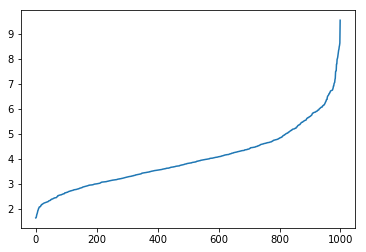

In [38]:
%matplotlib inline
plt.plot(samples)
plt.show()